In [19]:
import time
import numpy as np
import serial
import struct
import simple_pid
import matplotlib.pyplot as plt


def step(ser, motor_command: int):
    to_send = struct.pack("<h", motor_command)
    ser.write(to_send)
    resp = ser.read(8)
    motor_angle, pendulum_angle = struct.unpack("<ff", resp)
    return motor_angle, pendulum_angle

go
pendulum fell


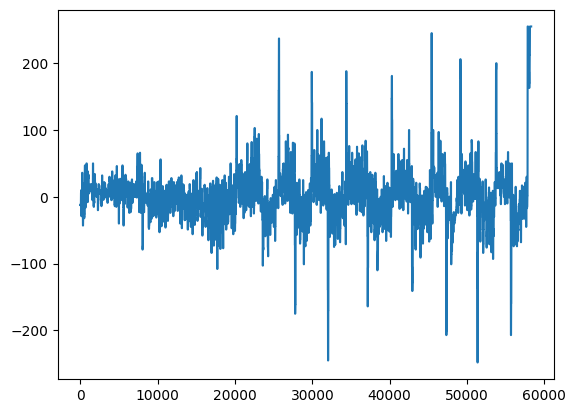

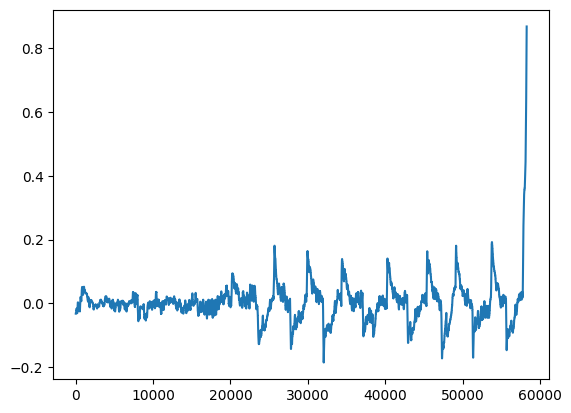

In [57]:
angle_thresh = 0.5 # rad

ser = serial.Serial('/dev/ttyACM0', 57600)
Kp = 1.5
Ki = 5.0
Kd = 0.1

PID = simple_pid.PID(Kp, Ki, Kd, setpoint=0)
actions = []
motor_angles = []
pendulum_angles = []

print("go")

motor_angle, pendulum_angle = step(ser, 0)

while True:
    act = PID(np.sin(pendulum_angle))
    act = -int(np.clip(act, -1, 1) * 255)
    motor_angle, pendulum_angle = step(ser, act)

    actions.append(act)
    motor_angles.append(motor_angle)
    pendulum_angles.append(np.sin(pendulum_angle))
    
    if np.cos(pendulum_angle) > -0.5:
        print("pendulum fell")
        break

step(ser, 0)
ser.close()

# plot actions, motor angles, pendulum angles
plt.figure(1)
plt.plot(actions)
plt.figure(2)
plt.plot(pendulum_angles)